In [22]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime, timedelta
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import itertools
from pylab import rcParams
import pickle
import warnings
warnings.filterwarnings("ignore")

In [23]:
home = raw_input("Which Home?")
file_path = 'Year1/Home' + home + '_yr1.csv'

Which Home?1


In [24]:
print(file_path)
df = pd.read_csv(file_path, names=['Consumption'])
#print(df)
def datetime_range(start, end, delta):
    end += 4*delta
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt for dt in 
       datetime_range(datetime(2014, 12, 1, 0), datetime(2015, 11 , 30 , 23), 
       timedelta(minutes=15))]
df['date/time'] = dts

Year1/Home1_yr1.csv


In [27]:
for i, row in df.iterrows():
#handling seasons
    df.at[i, 'Year'] = row[1].year
    df.at[i, 'Date'] = row[1].day
    df.at[i, 'Month'] = row[1].month
    df.at[i, 'Hour'] = row[1].hour
    df.at[i, 'Minute'] = row[1].minute
    if row[1].month in range(1,4) :
        df.at[i, 'Summer'] = 1
    elif row[1].month in range(4,7):
        df.at[i, 'Spring'] = 1
    elif row[1].month in range(7,10):
        df.at[i, 'Fall'] = 1
    elif row[1].month in range(10,13):
        df.at[i, 'Winter'] = 1
        
#handling peak hours   
    if row[1].hour in [0,1,2,3,4,5,6,7,20,21,22,23]:
        df.at[i, 'Peak Hour'] = 1
    else:
        df.at[i, 'Peak Hour'] = 0
        
#handling holidays & weekends
    if row[1].weekday() in [5,6] :
        df.at[i, 'Holiday'] = 1
    else:
        df.at[i, 'Holiday'] = 0

df['Spring'].fillna(0,inplace=True)
df['Fall'].fillna(0,inplace=True)
df['Summer'].fillna(0,inplace=True)
df['Winter'].fillna(0,inplace=True)

In [28]:
year = raw_input("Enter the Year:")
month = raw_input("Enter the Month:")
date = raw_input("Enter the Date:")
hour = raw_input("Enter the Hour:")
minute = raw_input("Enter the Minute:")
date1 = datetime(int(year), int(month), int(date), int(hour), int(minute) , 0)
print(date1)

Enter the Year:2015
Enter the Month:11
Enter the Date:30
Enter the Hour:00
Enter the Minute:0
2015-11-30 00:00:00


In [29]:
for i, row in df.iterrows():
    if row[1] == date1:
        break
x_train = df[['Year','Date','Month','Hour','Minute','Summer','Winter', 'Fall','Spring' , 'Holiday', 'Peak Hour']][:i]
y_train = df[['Consumption']][:i]
x_test = df[['Year','Date','Month','Hour','Minute','Summer','Winter', 'Fall','Spring' , 'Holiday', 'Peak Hour']] [i:96+i]
y_test = df[['Consumption']][i:96+i]

In [30]:
# Find the end interval after 1 day
end_dt = date1 + timedelta(days=1) - timedelta(minutes=15)
print(end_dt)

2015-11-30 23:45:00


Mean absolute error LR: 1.206663472


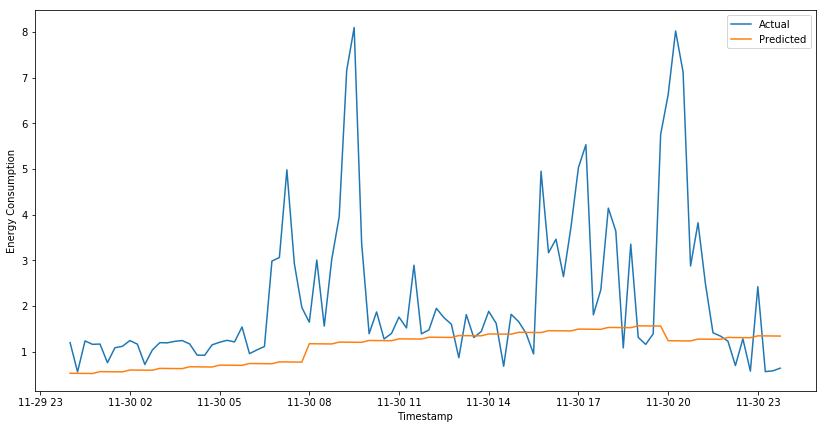

In [31]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred_r = regr.predict(x_test)
#print(y_pred_r)
print("Mean absolute error LR: %.9f"
      % mean_absolute_error(y_test,y_pred_r))
y_pred_r = pd.DataFrame({'Predicted Consumption':y_pred_r[:,0]}, index=y_test.index) 
dur = [dt for dt in 
       datetime_range(datetime(int(year), int(month), int(date), int(hour), int(minute)), datetime(2015, 12 , 31 , 23), 
       timedelta(minutes=15))]
dur = dur[0:96]
y_pred_r['Actual Consumption'] = y_test
y_pred_r['Date/Time'] = dur
#display(y_pred_r)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
plt.plot(y_pred_r['Date/Time'], y_pred_r['Actual Consumption'], label="Actual")
plt.plot(y_pred_r['Date/Time'], y_pred_r['Predicted Consumption'], label="Predicted")
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

Mean absolute error LR: 1.504697500


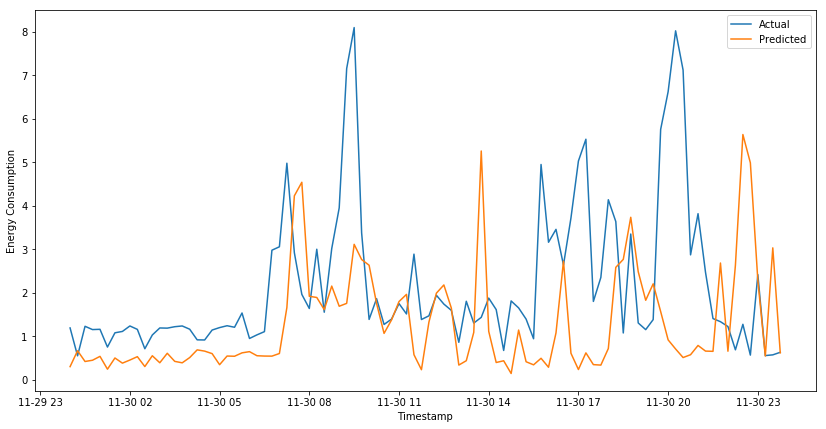

In [32]:
regr = KNeighborsRegressor(n_neighbors=1)
regr.fit(x_train, y_train)
y_pred_r = regr.predict(x_test)
#print(y_pred_r)
print("Mean absolute error LR: %.9f"
      % mean_absolute_error(y_test,y_pred_r))
y_pred_r = pd.DataFrame({'Predicted Consumption':y_pred_r[:,0]}, index=y_test.index) 
dur = [dt for dt in 
       datetime_range(datetime(int(year), int(month), int(date), int(hour), int(minute)), datetime(2015, 12 , 31 , 23), 
       timedelta(minutes=15))]
dur = dur[0:96]
y_pred_r['Actual Consumption'] = y_test
y_pred_r['Date/Time'] = dur
#display(y_pred_r)
# plot
plt.plot(y_pred_r['Date/Time'], y_pred_r['Actual Consumption'], label="Actual")
plt.plot(y_pred_r['Date/Time'], y_pred_r['Predicted Consumption'], label="Predicted")
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

Mean absolute error LR: 1.407701219


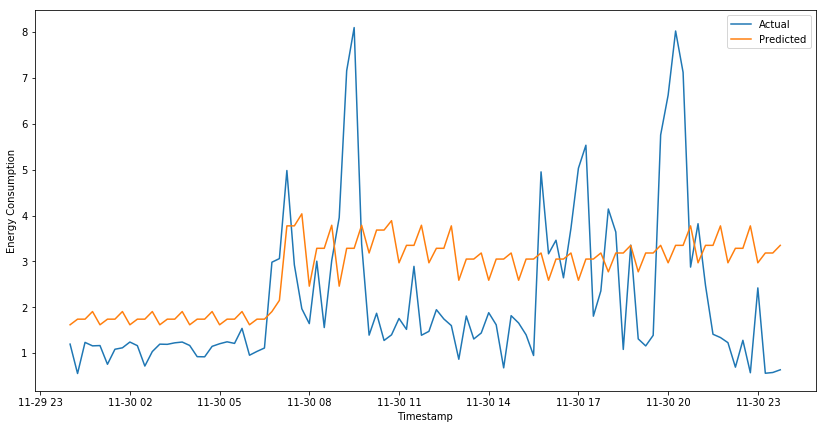

In [33]:
regr = AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
regr.fit(x_train, y_train)
y_pred_r = regr.predict(x_test)
print("Mean absolute error LR: %.9f"
      % mean_absolute_error(y_test,y_pred_r))
dur = [dt for dt in 
       datetime_range(datetime(int(year), int(month), int(date), int(hour), int(minute)), datetime(2015, 12 , 31 , 23), 
       timedelta(minutes=15))]
dur = dur[0:96]
plt.plot(dur, y_test, label="Actual")
plt.plot(dur, y_pred_r, label="Predicted")
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()
#print(y_pred_r)

Mean absolute error LR: 1.116673598


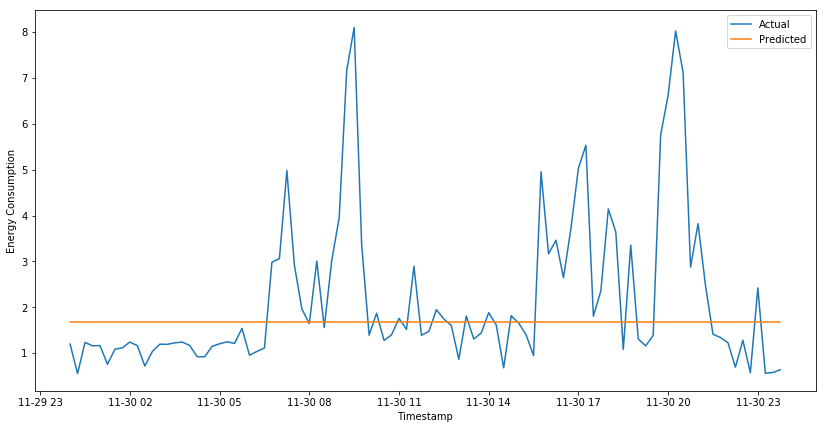

In [34]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
y_pred_r = regr.predict(x_test)
print("Mean absolute error LR: %.9f"
      % mean_absolute_error(y_test,y_pred_r))
dur = [dt for dt in 
       datetime_range(datetime(int(year), int(month), int(date), int(hour), int(minute)), datetime(2015, 12 , 31 , 23), 
       timedelta(minutes=15))]
dur = dur[0:96]
plt.plot(dur, y_test, label="Actual")
plt.plot(dur, y_pred_r, label="Predicted")
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

In [35]:
#print(file_path)
dft = pd.read_csv(file_path, names=['Actual'])
#print(dft.head())
intervals = pd.date_range(start='12/1/2014', end='12/1/2015', freq='15min', closed=None)[0:-1]
dft.insert(0, 'Timestamp', intervals)
dft = dft.set_index('Timestamp')

#print(dft.index)
#print(dft['2014-12-1 00:00:00':])

In [36]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
# find the optimal set of parameters that yields the best performance for our model
# Choose the one with the least resulting AIC value
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dft,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:139669.968742
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:114416.69096
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:129033.825642
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:114454.740664
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:126106.815584
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:114269.750811
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:135941.085862
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:129935.544946
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:132445.991353
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:111039.430683
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:124559.318767
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:111077.857249
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:123160.632082
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:110966.635499
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:121839.957151
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:121873.72031
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:121842.423512
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:121841.93072
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:135617.833424
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - A

In [37]:
# Pick minimum params from generated arima_params
dataset = pickle.load(open('arima_params.pickle', 'rb'))
#print(dataset)
print(dataset[int(home)-1])
pdq = dataset[int(home)-1]

[1, 1, 0, 1, 1, 1, 1]


In [38]:
mod = sm.tsa.statespace.SARIMAX(dft,
                                order=(pdq[1], pdq[2], pdq[3]),
                                seasonal_order=(pdq[4], pdq[5], pdq[6], 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8346      0.004    199.326      0.000       0.826       0.843
ma.L1         -0.5268      0.006    -89.147      0.000      -0.538      -0.515
ar.S.L12       0.0201      0.004      4.573      0.000       0.012       0.029
ma.S.L12      -1.0120      0.001  -1151.988      0.000      -1.014      -1.010
sigma2         0.9999      0.004    234.609      0.000       0.992       1.008


In [39]:
# Forecasting
pred = results.get_prediction(start=date1, end=end_dt, dynamic=False)

Mean absolute error LR: 0.885857739


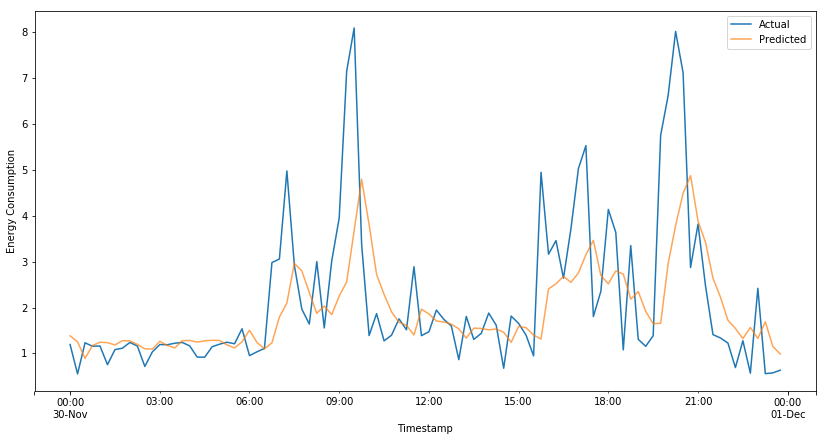

In [41]:
# Plot
ax = dft[date1:end_dt].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7))
ax.set_ylabel('Energy Consumption')
plt.legend()
df_forecasted = pred.predicted_mean
df_truth = dft[date1:end_dt]['Actual']
print("Mean absolute error LR: %.9f"
      % mean_absolute_error(df_truth,df_forecasted))
plt.show()

Mean absolute error LR: 0.475714550
